In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import random

from prettytable import PrettyTable
from matplotlib import pyplot as plt
plt.xkcd()

In [2]:
data = np.random.randint(low=500, high=50000, size=(50000, 1))
data = pd.DataFrame(data=data, columns=['price'])

In [3]:
data = np.array(data['price'].values)

In [4]:
data

array([ 9914, 17728, 38146, ..., 25778, 19181, 16568])

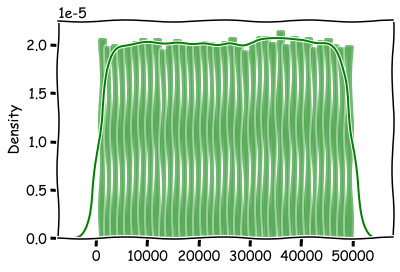

In [5]:
sns.distplot(data, color='g')
plt.show()

In [6]:
mean_mu = np.mean(data)
print(mean_mu)

25281.50774


In [7]:
std_popn = np.std(data)
print(std_popn)

14269.294867889585


### Central Limit Theorem

In [8]:
def get_samples_and_means(data, n, m):
    n_samples_means = []
    for i in range(n):
        samples = random.sample(range(0, data.shape[0]), m)
        # print(samples) # refers to index values
        # print(data[samples]) # taking the actual data from samples (indicies)
        n_samples_means.append(data[samples].mean())
    return np.array(n_samples_means)

In [9]:
def apply_central_limit_theorem(data, mean_mu, n, m):
    sample_data = get_samples_and_means(data=data, n=n, m=m)
    
    sns.distplot(sample_data, color='r')
    plt.axvline(mean_mu, linestyle='--', color='b', label='mean_mu')
    plt.axvline(sample_data.mean(), linestyle='--', color='cyan', label='sample_mean')
    plt.title("{} samples of size {}".format(n, m))
    plt.legend()
    plt.show()
    
    return None

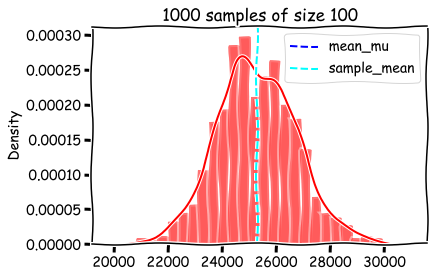

In [10]:
apply_central_limit_theorem(data=data, mean_mu=mean_mu, n=1000, m=100)

### Take bunch of samples

In [11]:
sample_means = {}
n_nums = [100, 200, 300, 500, 1000]
m_sizes = [100, 200, 300, 500, 1000]

for (n, m) in zip(n_nums, m_sizes):
    sample_means['{}_samples_{}_size'.format(n, m)] = get_samples_and_means(data=data, n=n, m=m)

In [12]:
sample_means.keys()

dict_keys(['100_samples_100_size', '200_samples_200_size', '300_samples_300_size', '500_samples_500_size', '1000_samples_1000_size'])

In [13]:
x = PrettyTable()
x = PrettyTable(["#samples_name", "P_Mean", "Sampel mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])

for i, key in enumerate(sample_means.keys()):
    sample_mean = np.round(np.array(sample_means[key]).mean(), 3)
    sample_std = np.round(np.array(sample_means[key]).std(), 3)
    population_std_est = np.round(std_popn/np.sqrt(m_sizes[i]), 3)
    
    row = []
    row.append(key)
    row.append(mean_mu)
    row.append(sample_mean)
    row.append(std_popn)
    row.append(sample_std)
    row.append(str(sample_mean)+u"\u2248"+str(mean_mu))
    row.append(str(sample_std)+u"\u2248"+str(population_std_est))
    x.add_row(row)
print(x)

+------------------------+-------------+-------------+--------------------+------------+-----------------------+-------------------+
|     #samples_name      |    P_Mean   | Sampel mean |       P_Std        | Sample Std |        mu_x≈mu        |    std_x≈std/√n   |
+------------------------+-------------+-------------+--------------------+------------+-----------------------+-------------------+
|  100_samples_100_size  | 25281.50774 |  25124.442  | 14269.294867889585 |  1338.241  | 25124.442≈25281.50774 | 1338.241≈1426.929 |
|  200_samples_200_size  | 25281.50774 |  25303.985  | 14269.294867889585 |  934.097   | 25303.985≈25281.50774 |  934.097≈1008.992 |
|  300_samples_300_size  | 25281.50774 |  25276.282  | 14269.294867889585 |  750.794   | 25276.282≈25281.50774 |  750.794≈823.838  |
|  500_samples_500_size  | 25281.50774 |  25280.414  | 14269.294867889585 |  634.216   | 25280.414≈25281.50774 |  634.216≈638.142  |
| 1000_samples_1000_size | 25281.50774 |  25291.288  | 14269.29486788